In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the Iris dataset
iris = pd.read_csv("/content/IRIS.csv")



In [10]:
# Step 2: Display basic information and summary statistics about the dataset
print("Dataset Information:")
print(iris.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
print("\nSummary Statistics:")
print(iris.describe())




Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


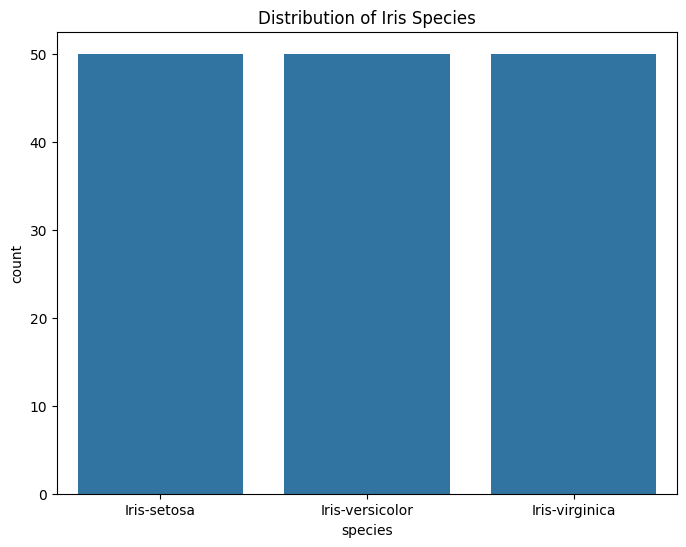

In [12]:
# Step 3: Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=iris)
plt.title('Distribution of Iris Species')
plt.show()



<Figure size 900x400 with 0 Axes>

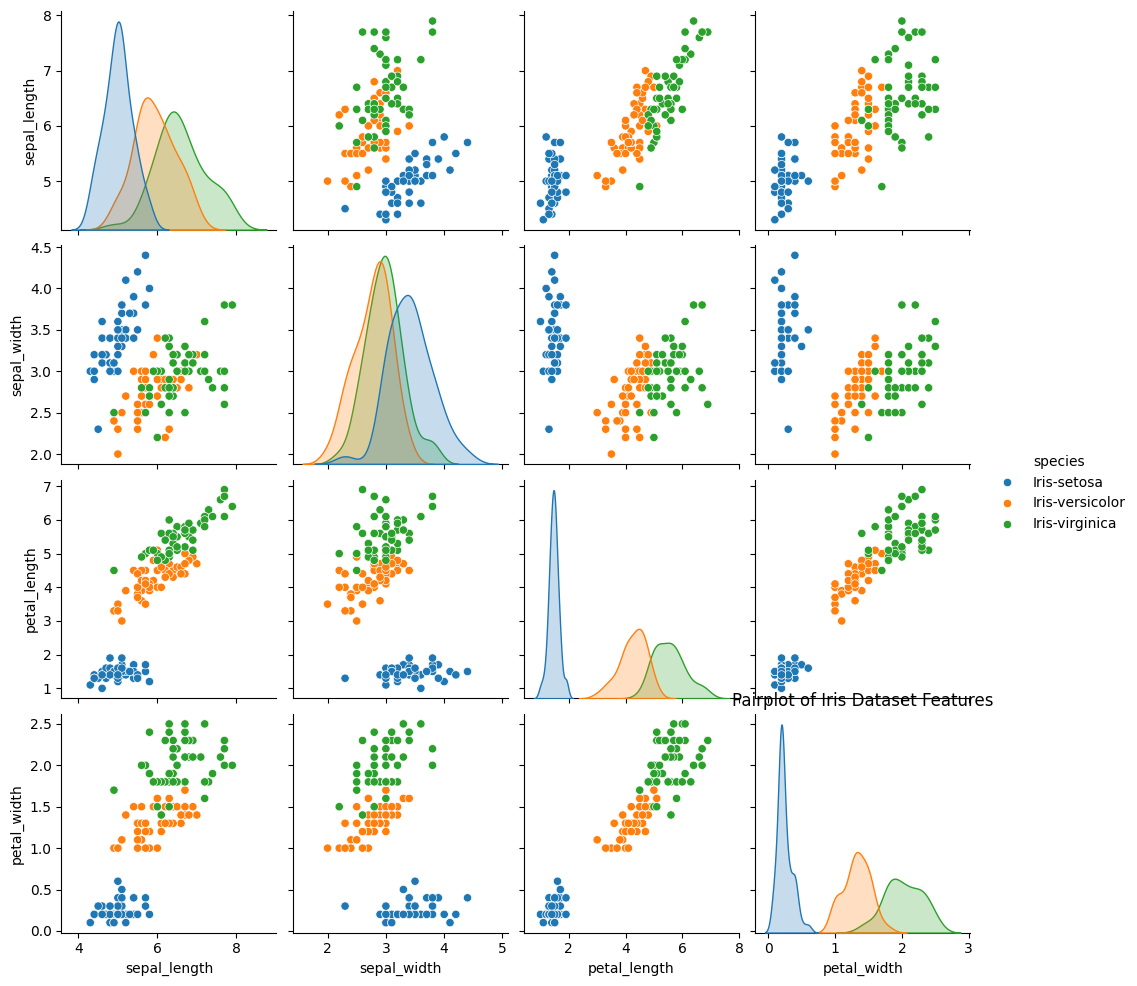

In [17]:
# Step 4: Visualize the relationships between features using a pairplot
plt.figure(figsize=(9,4))
sns.pairplot(iris, hue='species')
plt.title('Pairplot of Iris Dataset Features')
plt.show()



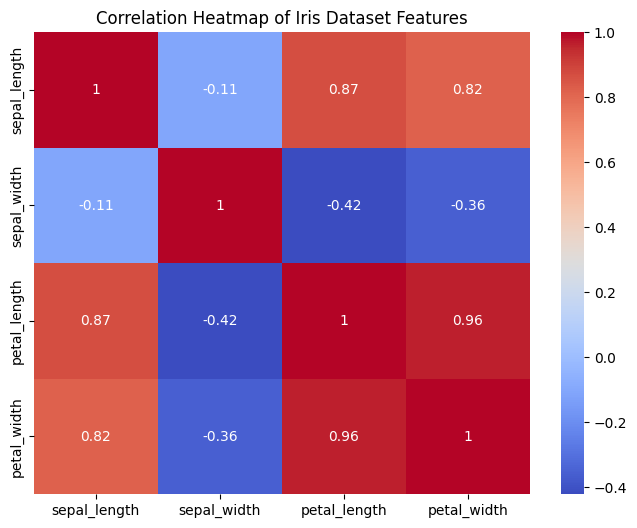

In [18]:
# Step 5: Visualize the correlation between features using a heatmap
plt.figure(figsize=(8, 6))
numeric_columns = iris.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(iris[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Dataset Features')
plt.show()




In [19]:
# Step 6: Extract features (sepal_length, sepal_width, petal_length, petal_width) and target variable (species)
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Build a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier(n_neighbors=5))  # K-Nearest Neighbors classifier
])

# Step 9: Train the model
pipeline.fit(X_train, y_train)

# Step 10: Make predictions
y_pred = pipeline.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
